In [15]:
import torch
import torchvision as tv
import matplotlib.pyplot as plt
import numpy as np

import json

In [18]:
with open("config.json") as f:
    cfg = json.load(f)

print(cfg)
fc = tv.datasets.FlyingChairs(cfg["flying_chairs"])

{'flying_chairs': 'C:\\Datasets'}


In [19]:
fc

Dataset FlyingChairs
    Number of datapoints: 22232
    Root location: C:\Datasets

In [5]:
im1, im2, flow = fc[0]
  # these are what we get out of the dataset

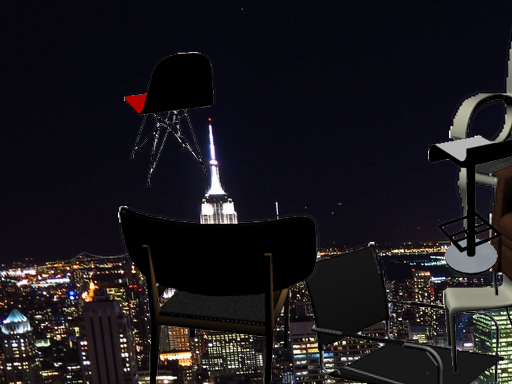

In [6]:
im1

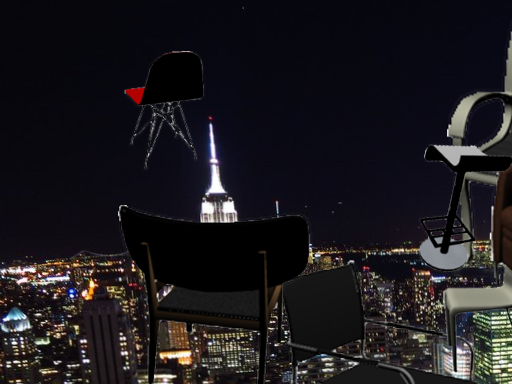

In [7]:
im2

In [8]:
flow.shape

(2, 384, 512)

(384, 512, 3)


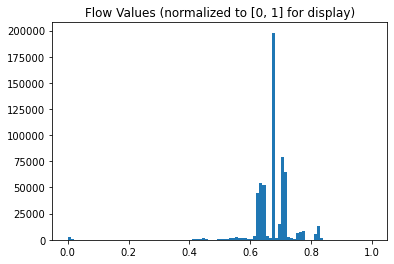

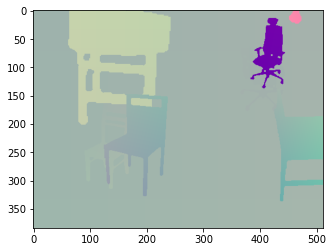

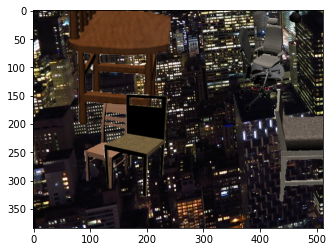

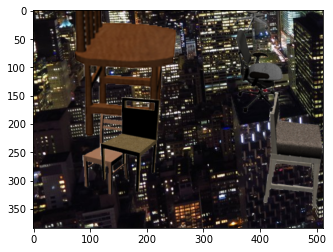

In [9]:
# for visualizing flow, add a dummy dimension for the third rgb channel
def display_flow(flow):
    flow_im = np.concatenate([flow, np.zeros((1, *flow.shape[1:]))], axis=0)
    flow_im = np.transpose(flow_im, (1, 2, 0))
    print(flow_im.shape)

    xdim, ydim, _ = flow_im.shape
    # normalize horizontal and vertical flows by their respective image dimensions
    flow_im[:, :, 0] = flow_im[:, :, 0] / xdim
    flow_im[:, :, 1] = flow_im[:, :, 1] / ydim

    # normalize to between one and 0 for image display, this is NOT to be done with the training data
    flow_im -= flow_im.min()
    flow_im /= flow_im.max()

    plt.hist(flow_im.flatten(), bins=100)  # for visualizing the distribution of values, just for troubleshooting
    plt.title("Flow Values (normalized to [0, 1] for display)")
    plt.show()
    plt.imshow(flow_im)
    plt.show()
    
im1, im2, flow = fc[8]
display_flow(flow)
plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

(384, 512, 3)


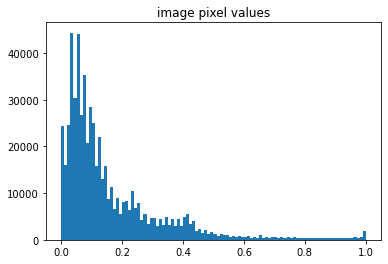

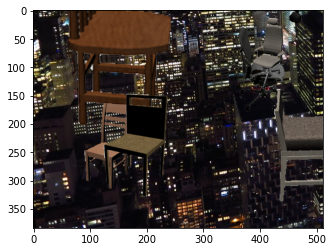

In [13]:
# for extracting the input images, converting them to numpy arrays and normalizing their values
b = np.array(im1.getdata())
b = np.array(b)
b = b.reshape([im1.size[1], im1.size[0], 3])
# b = np.transpose(b, (1,2,0))
b = b.astype(int)
b = b/255
print(b.shape)
plt.hist(b.flatten(), bins=100)
plt.title("image pixel values")
plt.show()
plt.imshow(b)
plt.show()